# Preprocessing Data for Models

In [1]:
import os
import cv2
import numpy as np


def binarize_array(array):
    """
    Binarizes a 2D numpy array such that all values > 1 become 1 and values <= 1 stay 0.

    Parameters:
    array (numpy.ndarray): A 2D numpy array to be binarized.

    Returns:
    numpy.ndarray: The binarized 2D numpy array.
    """
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a numpy array")
    if len(array.shape) != 2:
        raise ValueError("Input array must be 2D")

    binarized = np.where(array > 0.9, 1, 0)
    return binarized


def resize_data(data: np.ndarray, target_size: tuple = (640, 640)) -> np.ndarray:
    """
    Resize a numpy array (either a grayscale or an RGB image) to the target size.

    Args:
        data (np.ndarray): Input numpy array representing the grayscale or RGB image.
        target_size (tuple): Target resolution as (width, height). Default is (640, 640).

    Returns:
        np.ndarray: The resized numpy array.
    """
    if len(data.shape) == 2:
        # Grayscale image
        resized_data = cv2.resize(data, target_size, interpolation=cv2.INTER_NEAREST)
    elif len(data.shape) == 3 and data.shape[2] == 3:
        # RGB image
        resized_data = cv2.resize(data, target_size, interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError("Input data must be a 2D grayscale or a 3D RGB image with 3 channels.")
    
    return resized_data


def process_images(directory, target_size=(640, 640)):
    """
    Process all images in the given directory: resize them in place, keeping their color format (RGB or grayscale).

    Parameters:
    directory (str): Path to the directory containing the images.
    target_size (tuple): Target size for resizing. Default is (640, 640).

    Returns:
    None
    """
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Ensure the file is an image
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue

        try:
            # Load image in its original color format
            image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
            if image is None:
                print(f"Unable to read image: {file_path}")
                continue

            # Check if the image is grayscale or RGB
            if len(image.shape) == 2:  # Grayscale image
                # Binarize the image
                binarized_image = binarize_array(image)

                # Resize the binarized image
                processed_image = resize_data(binarized_image, target_size=target_size)
            elif len(image.shape) == 3 and image.shape[2] == 3:  # RGB image
                # Skip binarization for RGB images, only resize
                processed_image = resize_data(image, target_size=target_size)
            else:
                print(f"Unsupported image format: {file_path}")
                continue

            # Overwrite the original file
            cv2.imwrite(file_path, processed_image)
            print(f"Processed and saved: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")



def process_masks(directory, target_size=(640, 640)):
    """
    Process all images in the given directory: binarize and resize them in place.

    Parameters:
    directory (str): Path to the directory containing the images.
    target_size (tuple): Target size for resizing. Default is (640, 640).

    Returns:
    None
    """
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Ensure the file is an image
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue

        try:
            # Load image as grayscale
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Unable to read image: {file_path}")
                continue

            # Binarize the image
            binarized_image = binarize_array(image)

            # Resize the image
            resized_image = resize_data(binarized_image, target_size=target_size)

            # Overwrite the original file
            cv2.imwrite(file_path, resized_image)
            print(f"Processed and saved: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")



# Train
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels")


# Val
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/val/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/val/labels")


# Test
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/test/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/test/labels")

Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537287344397405_jpg.rf.08ef30de3b3553632614e9d9d91a1d6c.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-13-41-50-0400__CAM_BACK_LEFT__1537292906697405_jpg.rf.c82eb6c493df29690ba7f82ac0761a3b.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-13-41-50-0400__CAM_BACK__1537292545287558_jpg.rf.5d99566d5a92cfbea533a0daa13d3afb.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-12-07-26-0400__CAM_BACK_RIGHT__1537287341028113_jpg.rf.f2de666782b43bc12ed8f15c3c1e605d.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainyn

[ WARN:0@5.016] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels/n008-2018-09-18-13-10-39-0400__CAM_FRONT_LEFT__1537291099754799_jpg.rf.d9c9804afe6123e197ce10e90283db23_mask.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels/n008-2018-09-18-13-41-50-0400__CAM_BACK__1537292900037558_jpg.rf.6b503edb413f9c289bd69e7c5e430f74_mask.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels/n008-2018-09-18-13-10-39-0400__CAM_BACK_LEFT__1537291117147405_jpg.rf.54f5bd2a3802c7a2490b73012109b106_mask.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels/n008-2018-09-18-13-41-50-0400__CAM_BACK__1537292890887558_jpg.rf.839836aeb58484c787bf5a8941eb2a4b_mask.png
Processed and saved: /home/tim/Documents/06_Projekt_Rainy

### RainyNuScenes

In [2]:

# Train
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels")


# Val
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/val/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/val/labels")


# Test
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/test/images")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/test/labels")

Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537287344397405_jpg.rf.08ef30de3b3553632614e9d9d91a1d6c.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-13-41-50-0400__CAM_BACK_LEFT__1537292906697405_jpg.rf.c82eb6c493df29690ba7f82ac0761a3b.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-13-41-50-0400__CAM_BACK__1537292545287558_jpg.rf.5d99566d5a92cfbea533a0daa13d3afb.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-12-07-26-0400__CAM_BACK_RIGHT__1537287341028113_jpg.rf.f2de666782b43bc12ed8f15c3c1e605d.jpg
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainyn

### WoodScape-Extension

In [3]:

# Train
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_masks")


# Val
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/val/droplet_rgb")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/val/droplet_masks")


# Test
process_images("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/test/droplet_rgb")
process_masks("/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/test/droplet_masks")

Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/2358_MVR.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/3342_MVL.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/3172_MVL.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/0973_FV.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/4719_RV.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/4108_FV.png
Processed and saved: /home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/0775_FV.png
Processed and saved: /home/tim/

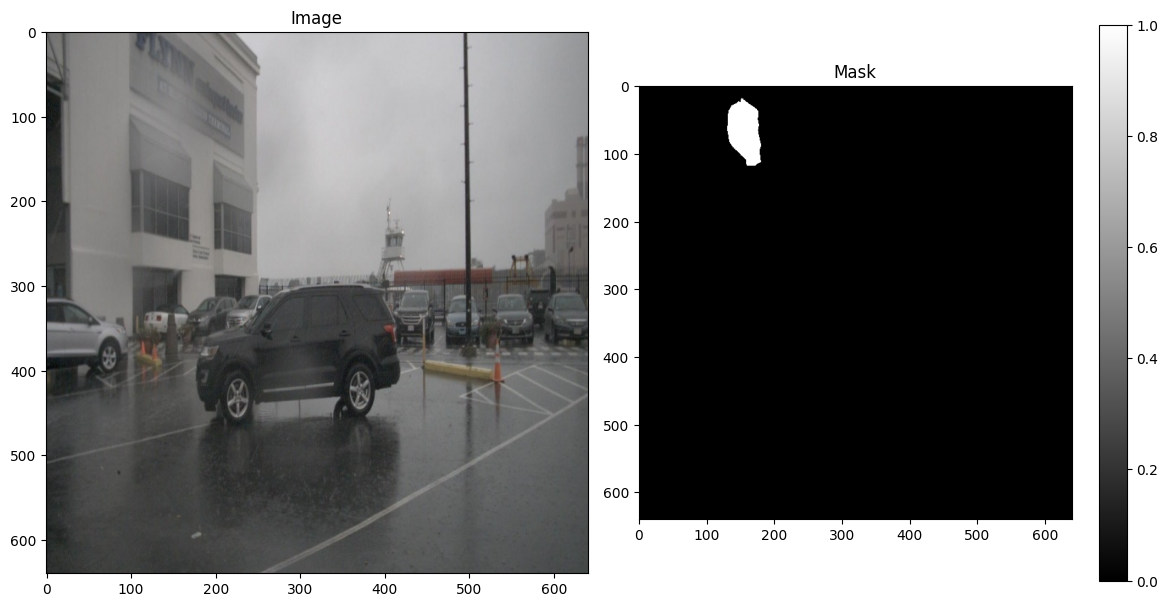

Mask Resolution: (640, 640)
Image Resolution: (640, 640, 3)


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Open the image file
image_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/images/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537286923547405_jpg.rf.16f9985c1919463b227882120a61ef84.jpg"  # Replace with your image file path
image_img = Image.open(image_path)


# Open the image file
mask_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/rainyNuScenes/dataset_split/train/labels/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537286923547405_jpg.rf.16f9985c1919463b227882120a61ef84_mask.png"  # Replace with your image file path
mask_img = Image.open(mask_path).convert("L")  # Convert to grayscale


# Convert the image to a NumPy array
image = np.array(image_img)
mask = np.array(mask_img)

# Create a Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first array as an RGB image
axes[0].imshow(image)
axes[0].set_title("Image")

# Plot the second array as a grayscale image
im2 = axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Mask")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Add some padding and show the plot
plt.tight_layout()
plt.show()

print("Mask Resolution:", mask.shape)
print("Image Resolution:", image.shape)


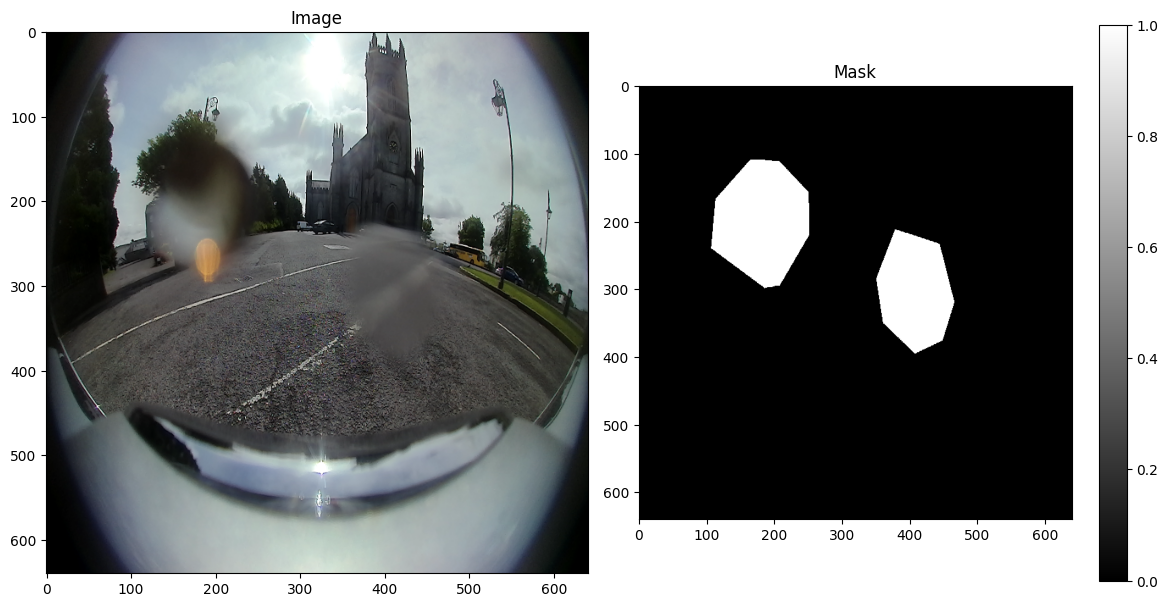

Mask Resolution: (640, 640)
Image Resolution: (640, 640, 3)


In [10]:


# Open the image file
mask_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_masks/0035_FV.png"  # Replace with your image file path
mask_img = Image.open(mask_path).convert("L")  # Convert to grayscale


# Open the image file
image_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/data/soiling_woodscape_data/train/droplet_rgb/0035_FV.png"  # Replace with your image file path
image_img = Image.open(image_path)


# Convert the image to a NumPy array
image = np.array(image_img)
mask = np.array(mask_img)

# Create a Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first array as an RGB image
axes[0].imshow(image)
axes[0].set_title("Image")

# Plot the second array as a grayscale image
im2 = axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Mask")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Add some padding and show the plot
plt.tight_layout()
plt.show()

print("Mask Resolution:", mask.shape)
print("Image Resolution:", image.shape)
